Nesse case eu irei considerar a nota de corte como bom ou ruim como 6

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                    11.0                  34.0  0.99780  3.51       0.56  \
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [5]:
corte = 6
binarizacao = df['quality'].apply(lambda x: "bom" if x > corte else "ruim")
binarizacao.value_counts()

quality
ruim    1382
bom      217
Name: count, dtype: int64

In [7]:
#adicionando a coluna bom_ou_ruim no df
df['bom_ou_ruim'] = binarizacao
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                    11.0                  34.0  0.99780  3.51       0.56  \
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality bom_ou_ruim  
0         9.4        5        ruim  
1         9.8        5        ruim  
2         9.8        5        ruim  
3         9.8        6        ruim  
4         9.4        5        ruim  
...       ...      ...         ...  
1594     10.5        5        ruim  
1595     11.2        6        ruim  
1596     11.0        6        ruim  
1597     10.2        5        ruim  
1598     11.0        6        ruim  

[1599 rows x 13 columns]

In [10]:
#Retirando a coluna quality
df = df.drop(columns = 'quality')

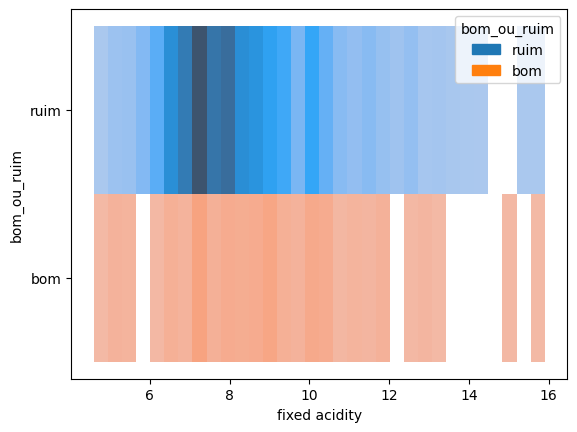

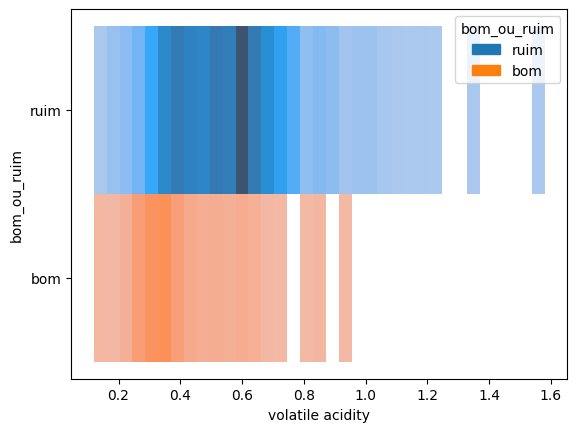

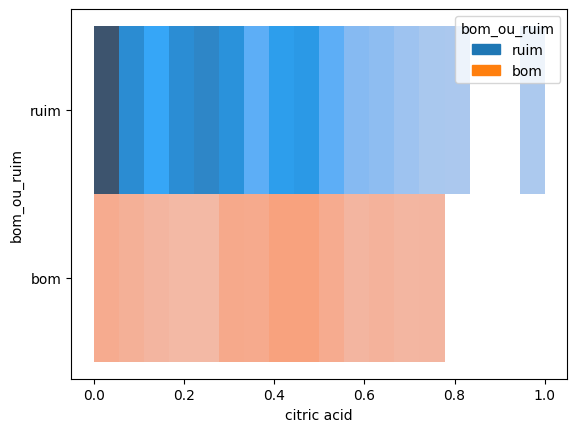

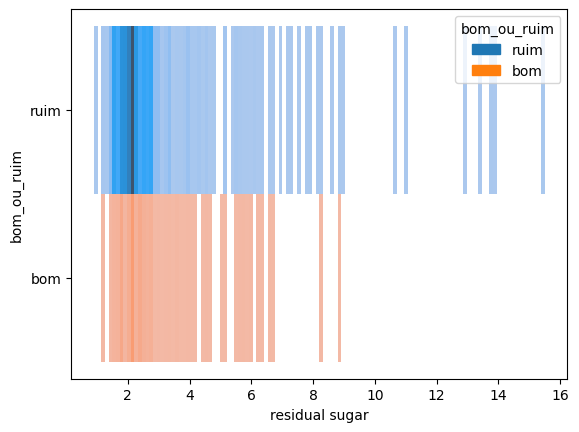

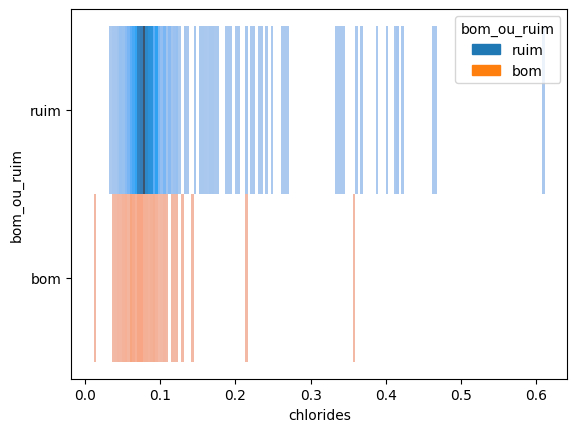

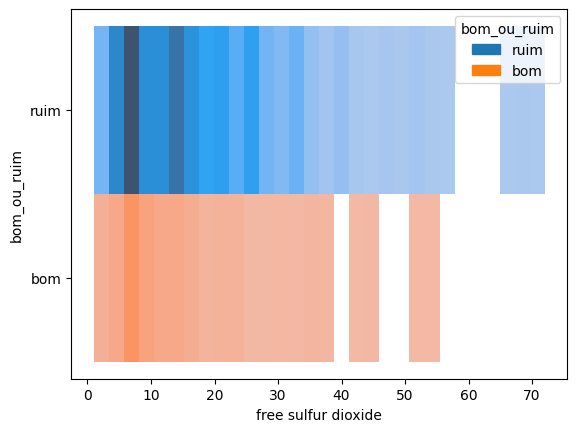

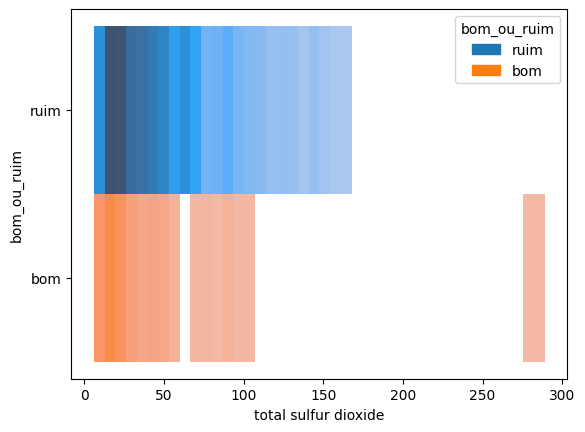

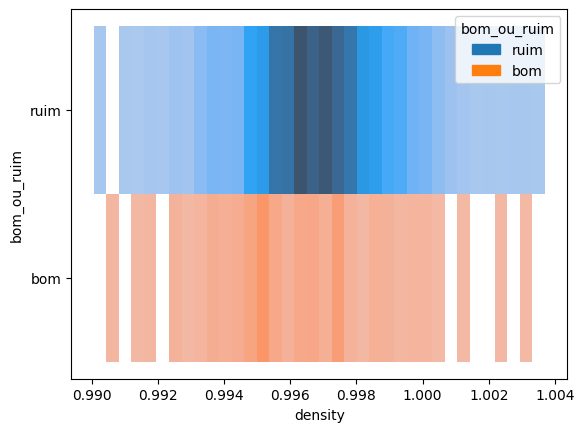

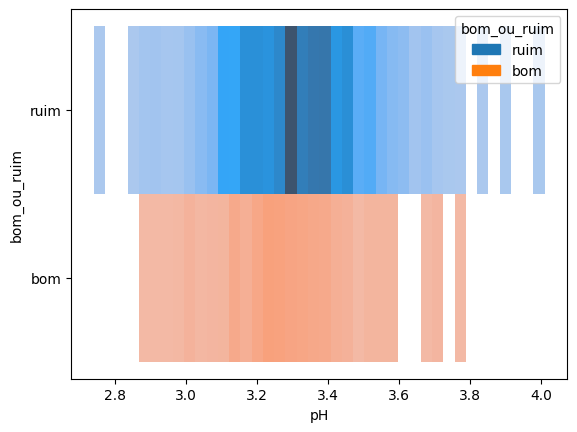

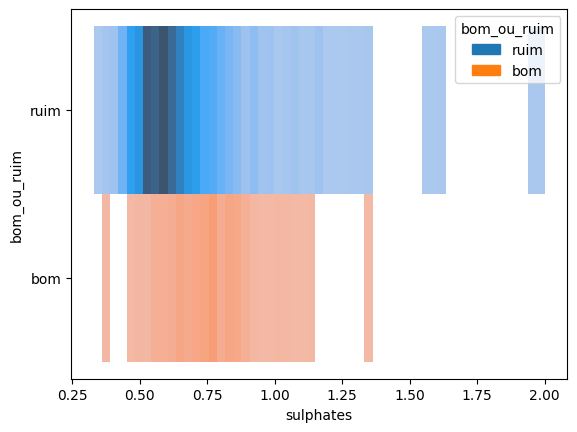

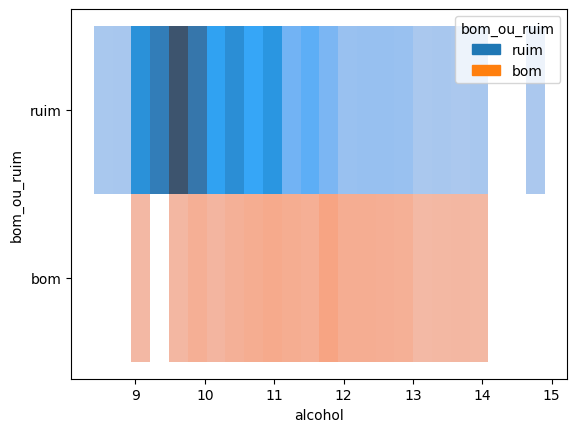

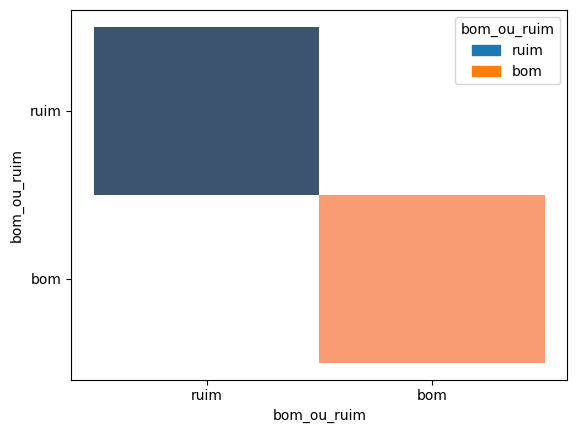

In [11]:
for col in df.columns:
    sns.histplot(data = df, x = col, y='bom_ou_ruim' ,hue = 'bom_ou_ruim', kde = True)
    plt.show()

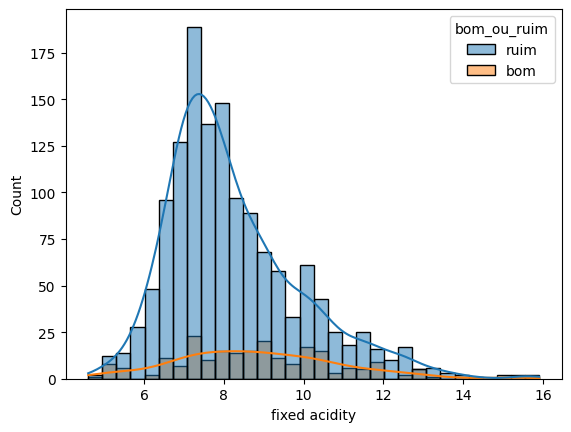

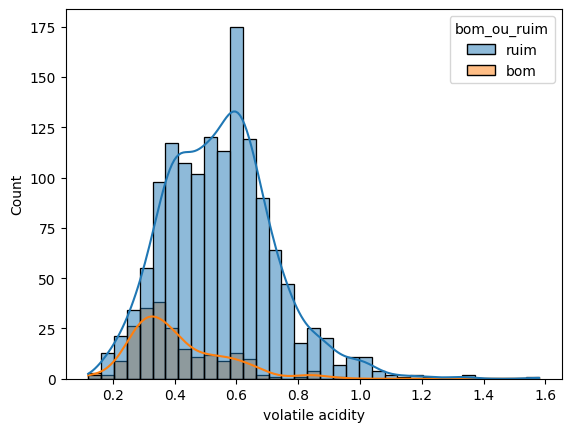

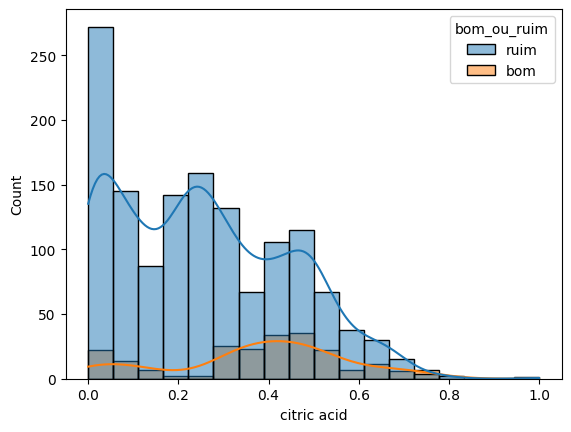

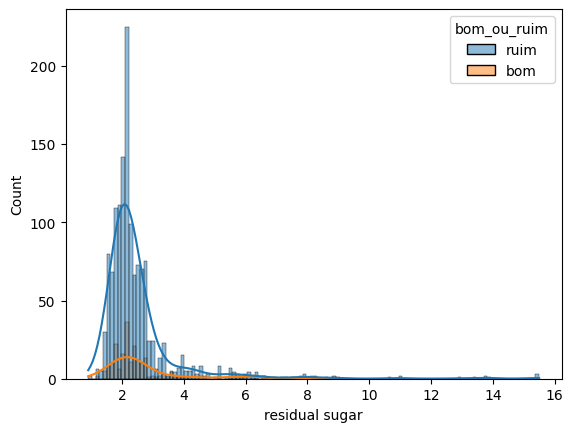

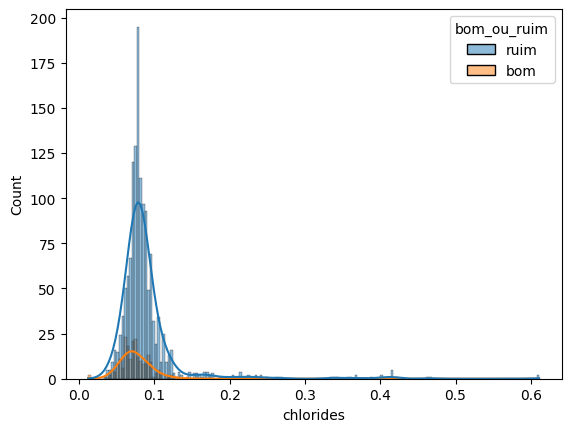

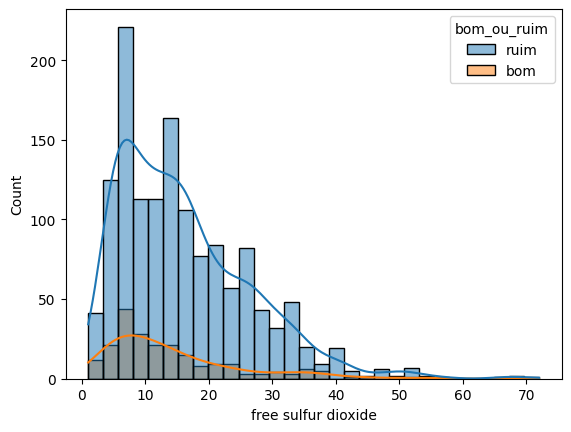

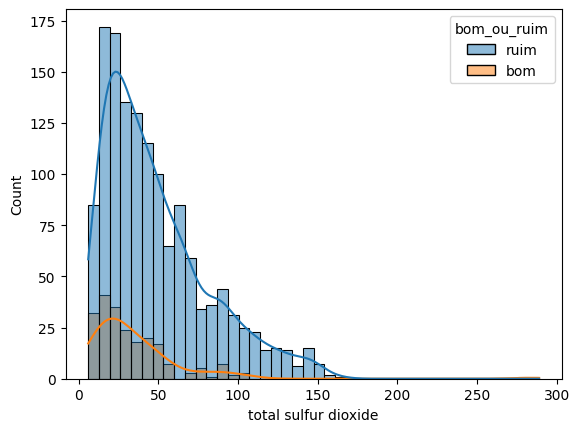

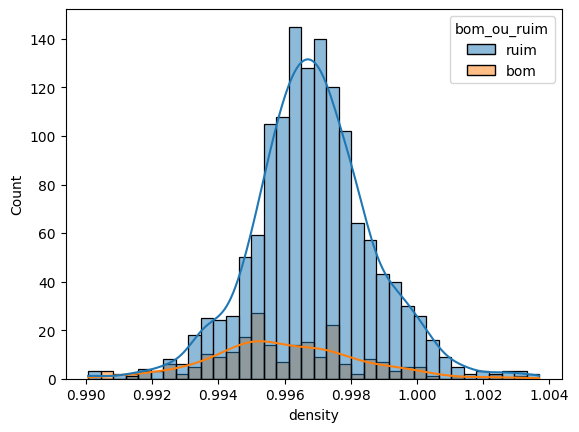

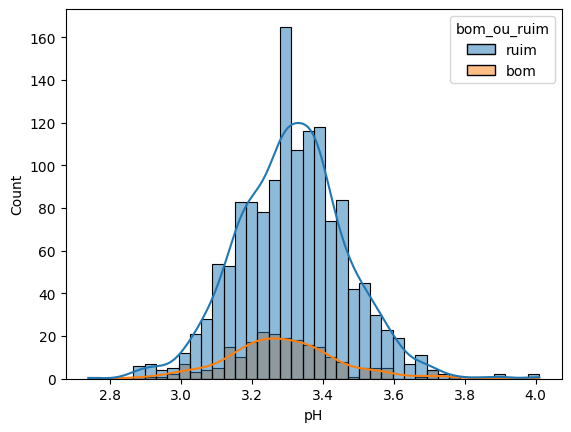

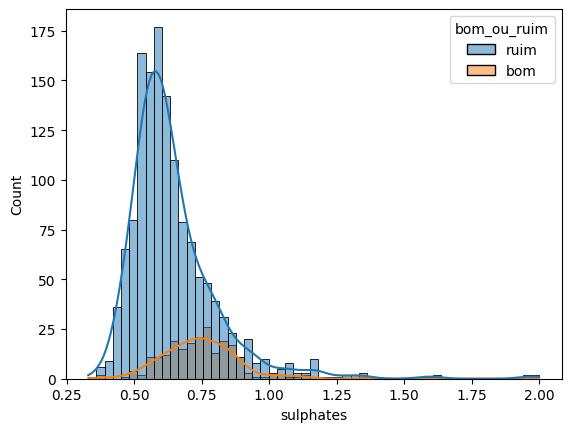

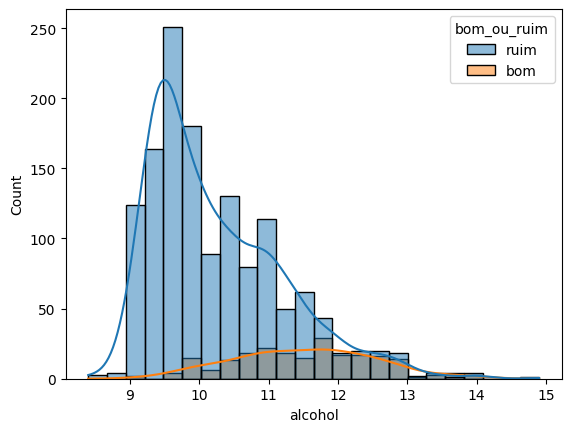

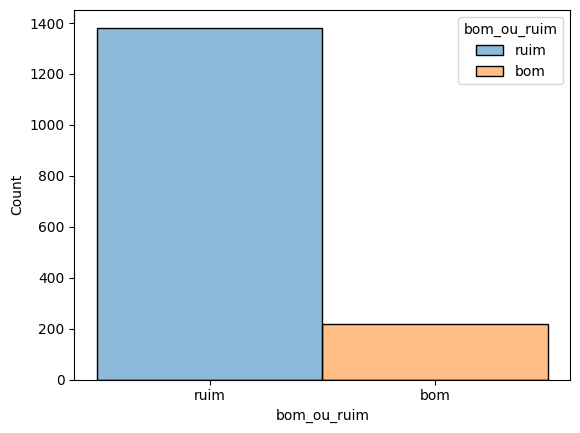

In [12]:
for col in df.columns:
    sns.histplot(data = df, x = col, hue = 'bom_ou_ruim', kde = True)
    plt.show()

c:\Users\Tayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


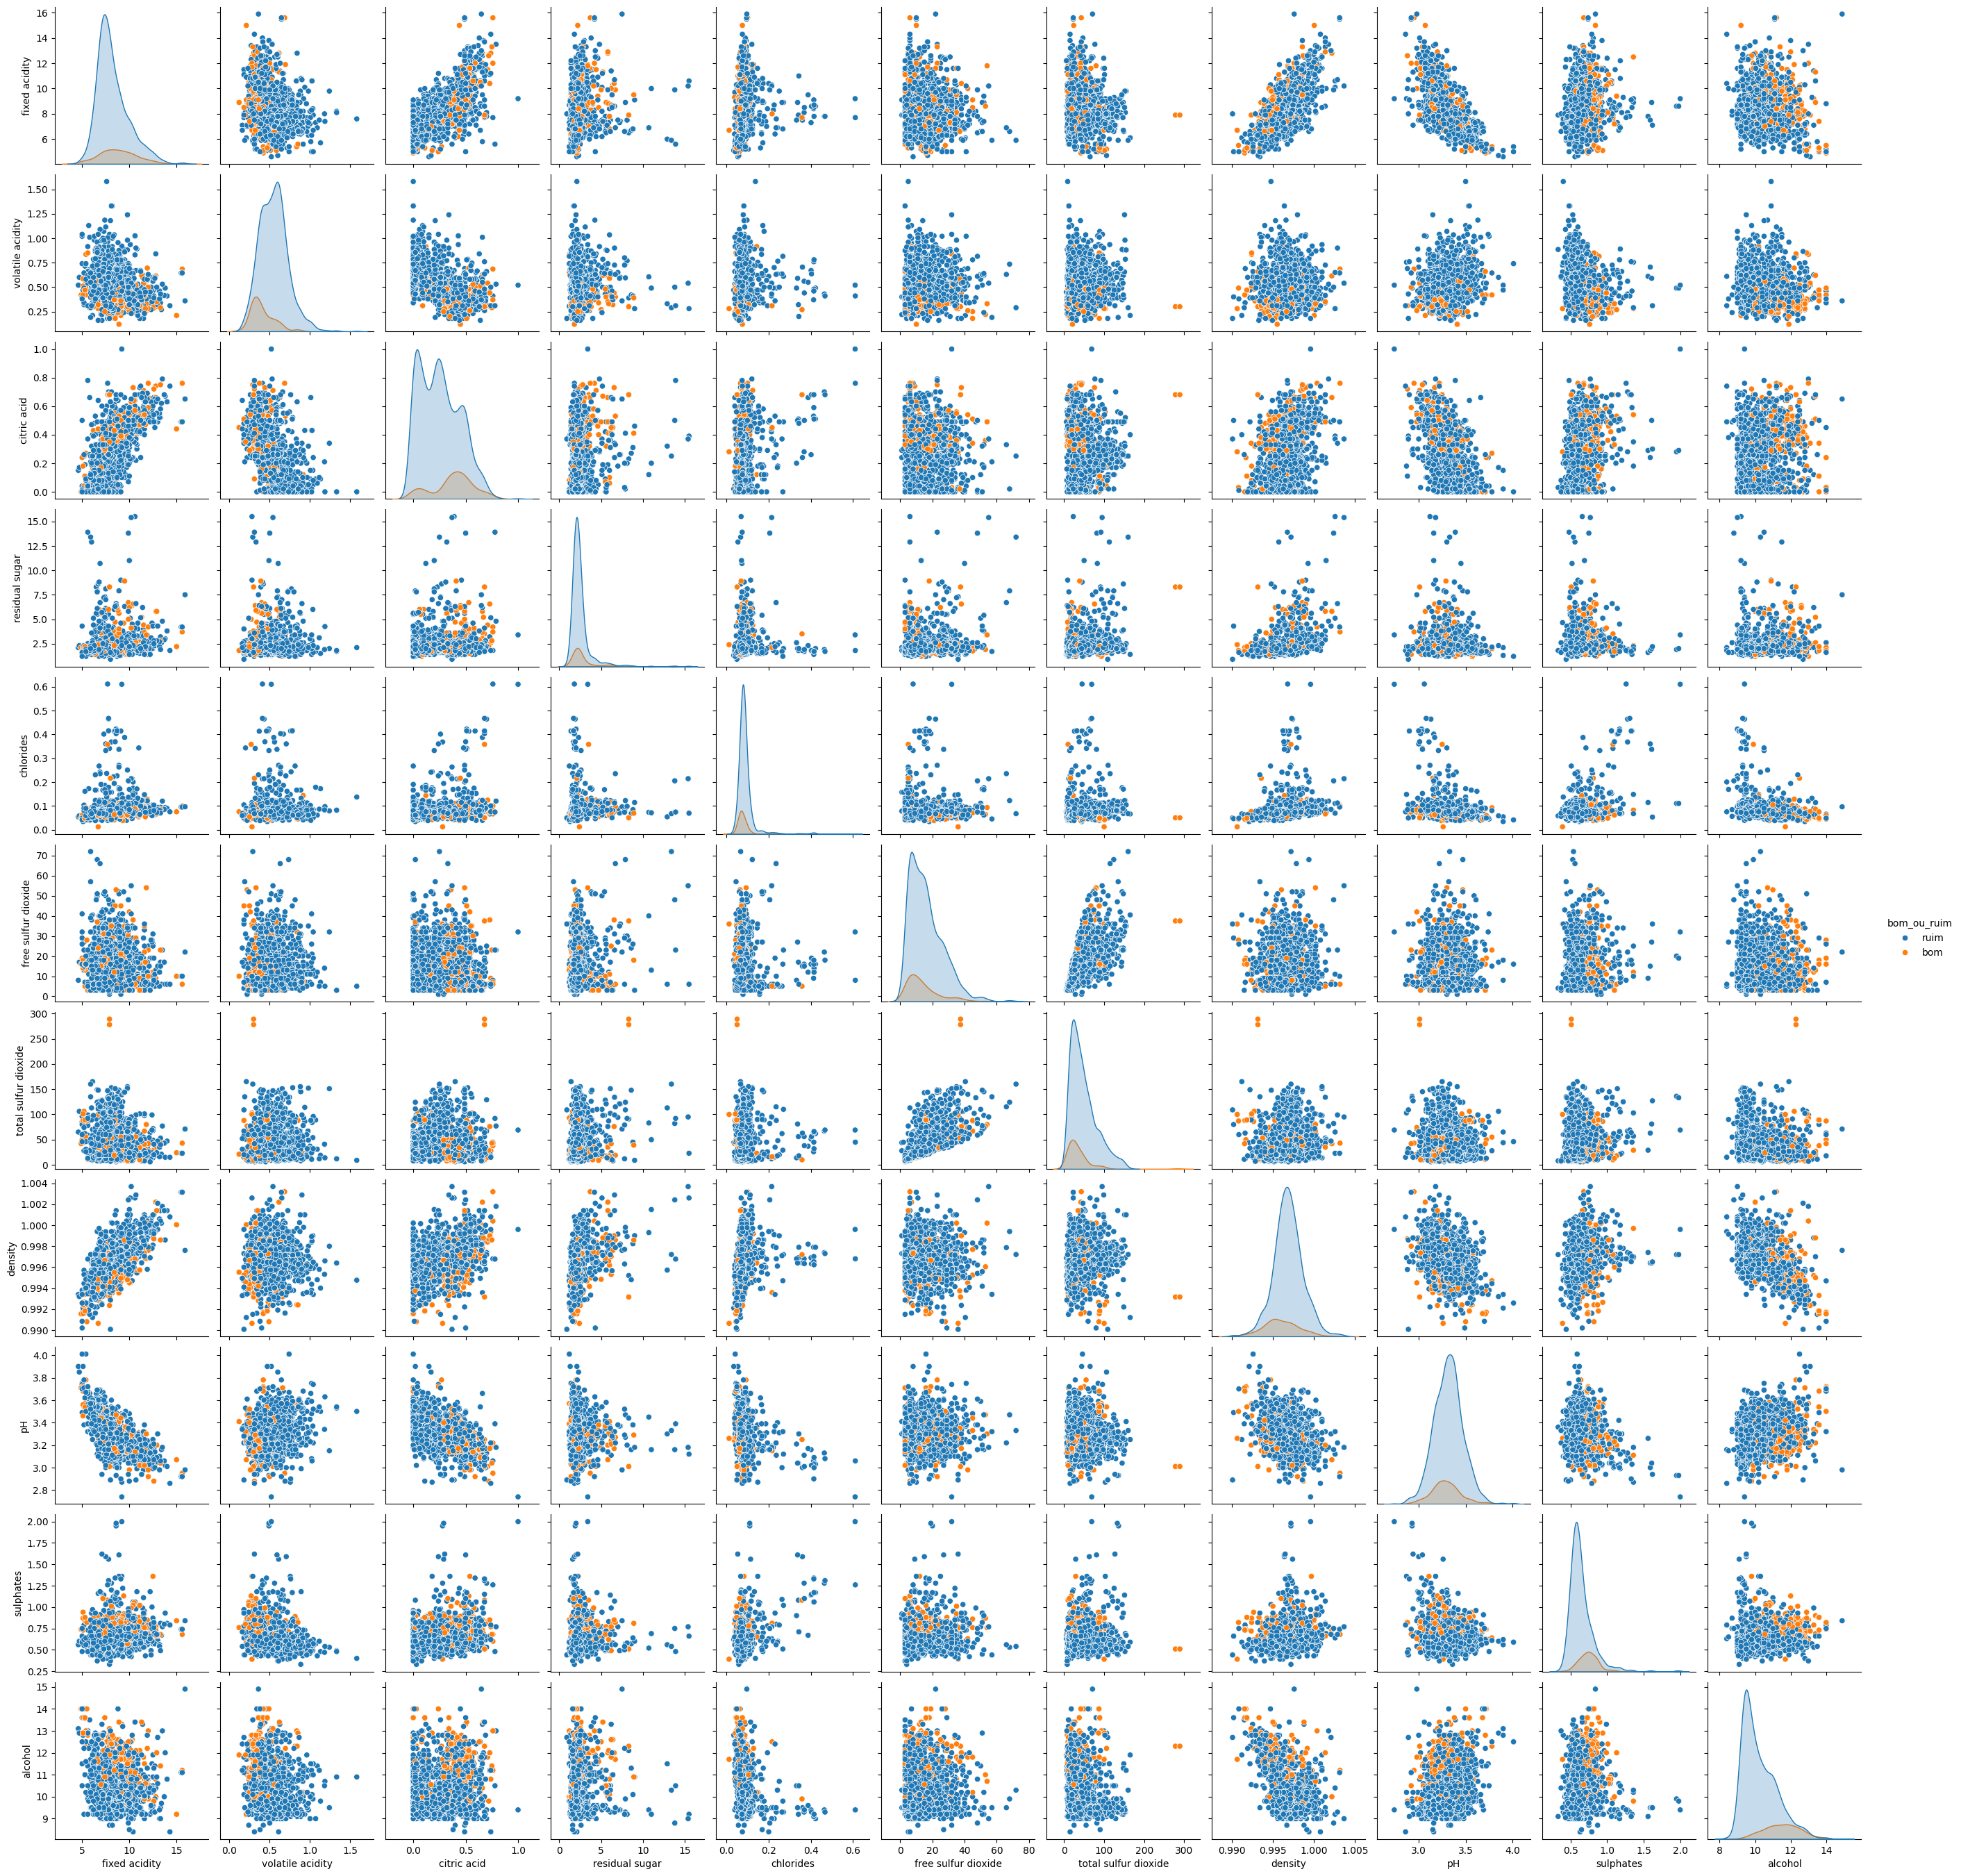

In [13]:
#Analisando pares de variaveis das 11 variaveis
sns.pairplot(df, hue = 'bom_ou_ruim')

In [16]:
# Separar features e variável alvo
X = df.drop(columns=["bom_ou_ruim"])
y = df["bom_ou_ruim"]

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar os tamanhos das divisões
X_train.shape, X_test.shape

((1279, 11), (320, 11))

 Isso significa que eu posso 1.279 amostras para treino e 320 para teste

In [19]:
# Criar o modelo
model = LogisticRegression(max_iter=1000, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.878125

Neste projeto, utilizei um modelo de Regressão Logística para classificar vinhos em duas categorias: "bom" e "ruim". Para isso, baseei-me em diversas características químicas dos vinhos, como acidez, álcool e outros fatores. A classificação foi feita com base na nota de qualidade dos vinhos, sendo que vinhos com qualidade acima de 6 foram considerados "bons" e os demais, "ruins".

Após preparar os dados e dividi-los em duas partes (uma para treinar o modelo e outra para testar sua precisão), treinei o modelo para fazer suas previsões. O modelo foi capaz de prever a qualidade dos vinhos com uma taxa de 87.8% de acerto, ou seja, ele classificou corretamente a maioria dos vinhos.

Isso mostra que a Regressão Logística foi uma boa escolha para esse tipo de tarefa, já que ela consegue fazer uma boa separação entre os vinhos "bons" e "ruins". No entanto, para entender melhor como o modelo se comporta em diferentes situações e tipos de erro, seria interessante analisar outras informações, como o número de acertos e erros em cada categoria.

Em próximos passos, poderia ser interessante testar outros modelos mais complexos ou ajustar algumas configurações do modelo para tentar melhorar ainda mais a precisão.